# Quiz 2 - FNN
Wyatt Blair

DUE: 5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [3]:
data = get_data()

___
## Feed-Forward Neural Networks (FNN)

$f_l(X_l) = a_l(w_l^T \cdot X_l); \forall{l} \in \text{hidden-layers}$

$l :=$ hidden layer index 

$X_l :=$ input data which has been  transformed by $(l-1)$ hidden layers

$a_l :=$ activation function for layer $l$

$w_l :=$ weights for hidden layer $l$

In [4]:
# define model using PyTorch

class FNN(nn.Module):
    
    def __init__(self, input_size, hidden_size):
        
        super(FNN, self).__init__()

        # First layer: input to hidden
        self.hidden_layer = nn.Linear(input_size, hidden_size)

        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        # Second layer: hidden to output
        self.output_layer = nn.Linear(hidden_size, 1)
    
    def forward(self, x):

        out = self.hidden_layer(x)
        out = self.relu(out)
        out = self.output_layer(out)
        
        return out


Training FNN:   0%|          | 0/200 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.54600
--> TEST : -3.71876
--> FULL : 0.30499
MSE-Scores: 
--> TRAIN: 0.01755
--> TEST : 0.07964
--> FULL : 0.02990


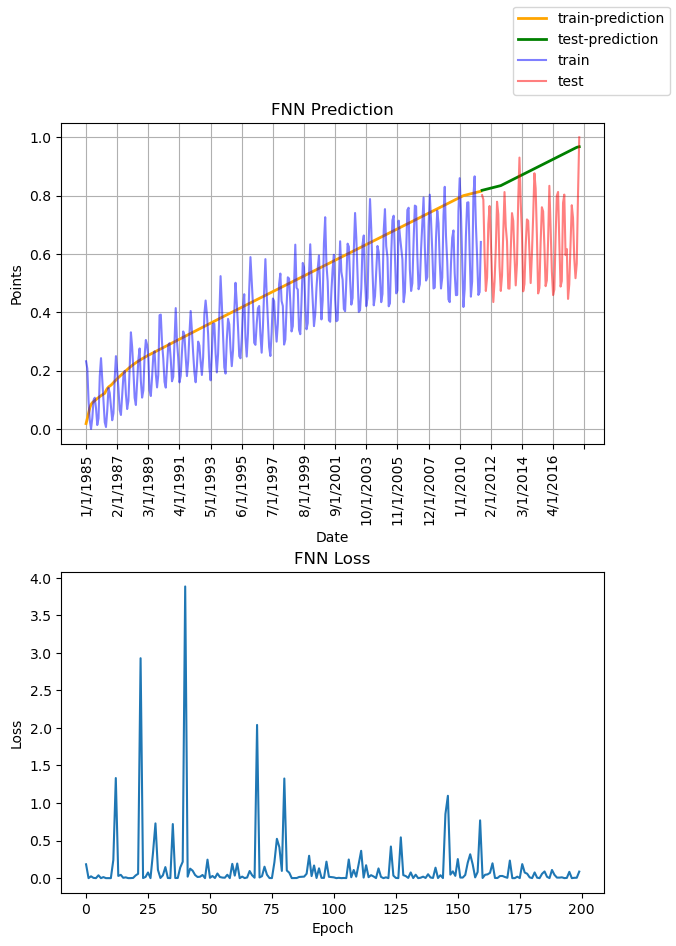

In [5]:
# instantiate model
model_kwargs = {
    'input_size': data['sequence_length'],
    'hidden_size': 200,
}
model = FNN(**model_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': model,
    'num_epochs': 200,
    'lr': 0.0001,
}
evaluate_model(**evaluation_kwargs)